# Problema 2 del segundo examen parcial

La solución de la ecuación 
$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}$$
sujeta a las condiciones de frontera:
$$u(0,t)=u(1,t)=0, \;\;\; t>0$$
Y la condición inicial:
$$u(x,0)=2x+1,\;\;\;0<x<1$$
Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,t)=\frac{2}{\pi}\sum_{n=1}^{\infty} \frac{3(-1)^{n+1}+1}{n}e^{-(n\pi)^2 t}sen(n\pi x)$$

Este problema modela la transferencia de calor en una barra ideal delgada, con $k=1$.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from math import *

Para empezar, graficamos la condición inicial.

In [21]:
f = np.poly1d([2,1])

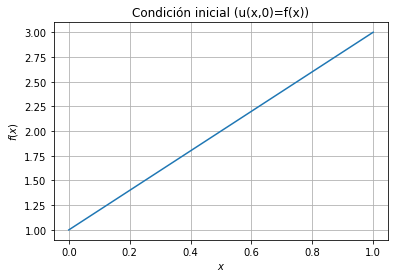

In [22]:
x = np.linspace(0,1,200)
plt.plot(x,f(x),label='$u(x,0)=x$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial (u(x,0)=f(x))")
plt.grid()
plt.show()

Usamos una serie de Fourier para aproximar la condición inicial $u(x,0)=f(x)=2x+1$.

In [23]:
def fourier(x,N): # N es el número de armónicos
    s = 0
    for n in range(1,N+1):
        s += ((3*(-1)**(n+1)+1)/n)*sin(n*pi*x)
    return (2/pi)*s

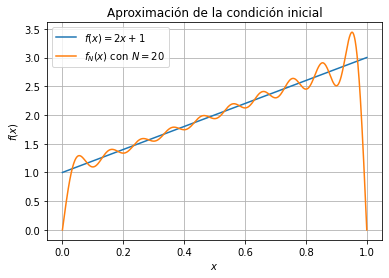

In [24]:
x1=[]
y1=[]
for i in range(1001):
  x1.append(0.001*i)
  y1.append(fourier(0.001*i,20))

plt.plot(x,f(x),label='$f(x)=2x+1$')
plt.plot(x1,y1,label='$f_N(x)$ con $N=20$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
plt.legend(loc='upper left')
plt.grid()
plt.show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

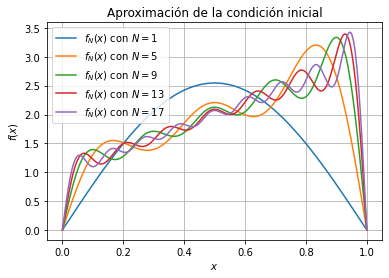

In [26]:
def Fourier(lista,N):
  l=[]
  for t in range(len(lista)):
    l.append(fourier(lista[t],N))
  return l

for i in range(1,20,4):
    plt.plot(x1,Fourier(x1,i),label='$f_N(x)$ con $N=%d$' %i)

plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
plt.legend(loc='upper left')
plt.grid()
plt.show()

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $t=0$.

In [27]:
def u(x,t):
  s = 0
  for n in range(1,81):
    s += ((3*(-1)**(n+1)+1)/n)*sin(n*pi*x)*e**((-t)*(n*pi)**2)
  return (2/pi)*s

y2=[]
for n2 in range(len(x1)):
  y2.append(u(x1[n2],0))


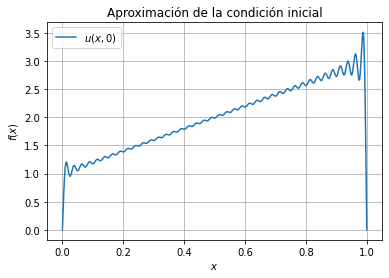

In [29]:
plt.plot(x1,y2,label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
plt.grid()
plt.legend(loc='upper left')
plt.show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$.

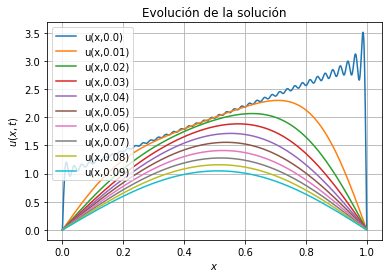

In [30]:
def u_n(lista,t):
  l=[]
  for n2 in range(len(lista)):
    l.append(u(x1[n2],t))
  return l


for t2 in range(0,10):
  v=0.01*t2
  plt.plot(x1,u_n(x1,0.01*t2), label='u(x,%r)'%v)

plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
plt.grid()
plt.legend(loc='upper left')
plt.show()

Y podemos ver esto en una gráfica en 3D.

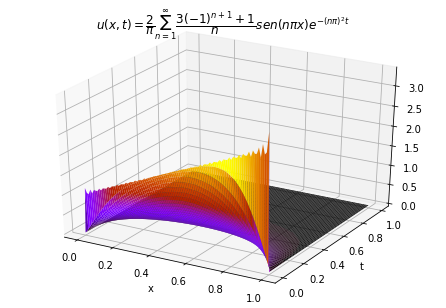

In [34]:

#region cuadrada donde se va a graficar u(x,t)
X=[]
T=[]
for t in range(101):
  X.append(0.01*t)
  T.append(0.01*t)

X,T=np.meshgrid(X,T)

def Z(x,t):
  m = np.zeros(np.shape(x))
  for i in range(np.shape(x)[0]):
    for j in range(np.shape(x)[1]):
      m[i][j]=u(x[i][j],t[i][j])
  return m

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,T,Z(X,T), rstride=1, cstride=1, cmap=cm.gnuplot)

plt.xlabel('x')
plt.ylabel('t')
plt.title('$u(x,t)=\dfrac{2}{\pi}\sum_{n=1}^{\infty}\dfrac{3(-1)^{n+1}+1}{n}sen(n\pi x)e^{-(n\pi)^2t}$')
plt.show()
